# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](../data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into a Pandas dataframe

In [24]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
# Read the data into a Panda's dataframe and display the head of the file.  Use PassengerID as the index_col
path = '../data/'
url = path + 'titanic.csv'
df = pd.read_csv(url, index_col='PassengerId')
df.shape
# drop the ones with null value
# df = df.dropna() 
# df.shape

(891, 11)

## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

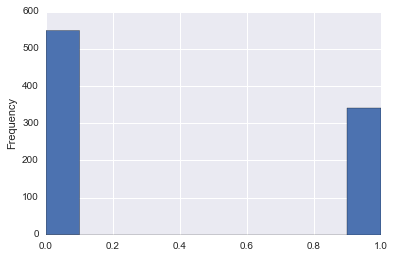

In [26]:
df.Survived.plot(kind='hist')

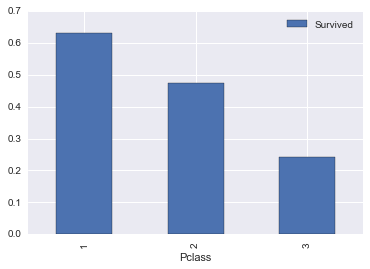

In [27]:
df[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind='bar')

Standard Deviation: 
           Parch
Pclass          
1       0.693997
2       0.690963
3       0.888861
Mean: 
           Parch
Pclass          
1       0.356481
2       0.380435
3       0.393075


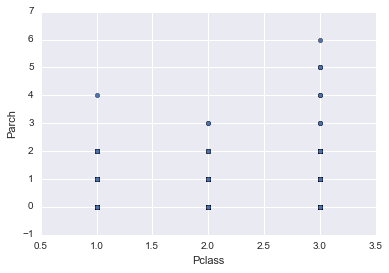

In [28]:
# Passenger class and Parent Children might be correlated. Look at a plot as well as mean, std of fare by class

df.plot(kind='scatter', x = 'Pclass', y= 'Parch')

print 'Standard Deviation: \n', df[['Parch', 'Pclass']].groupby('Pclass').std()
print 'Mean: \n', df[['Parch', 'Pclass']].groupby('Pclass').mean()

In [29]:
# look at correlation between numerical features to see if we should exclude any:
print df.corr()
# correlation is indeed high (-.55) between Fare and Pclass. We'll exclude Fare from our model.

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


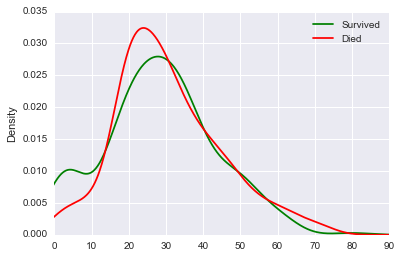

In [30]:
# look at density plot of Age among those who survived and those who did not.
# this shows a higher relative survival rate among children (younger than 13 or so) and
# lower relative survival rate among young adult passengers (between roughly 15 and 30).

survived = df['Survived']==1
df[survived].Age.plot(kind='kde', color='g')
df[~survived].Age.plot(kind='kde', color='r')
plt.xlim(0,90)
plt.legend(['Survived', 'Died'])

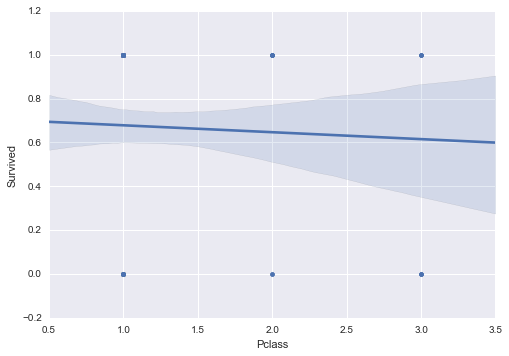

In [8]:
# Show the survial proability as a function of Pclass and Parch
ax = sns.regplot(x="Pclass", y="Survived", data=df)

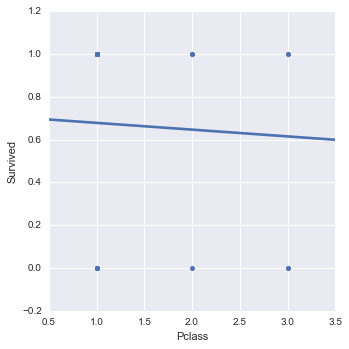

In [11]:
sns.lmplot(x='Pclass', y='Survived', data=df, ci=None, order=1)

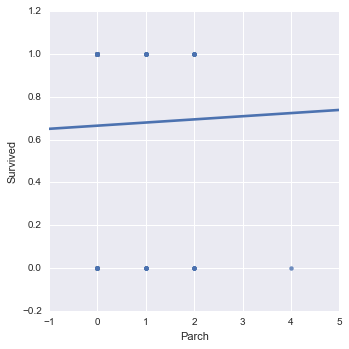

In [12]:
sns.lmplot(x='Parch', y='Survived', data=df, ci=None, order=1)

In [33]:
# define features and X, y variables
features = df.columns.drop(['Survived','Pclass', 'Parch'])
X = df[features]
y = df['Survived']

## Step 3: Split the data into training and testing sets

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

## Step 5: Make predictions on the testing set and calculate the accuracy

In [3]:
# class predictions


In [4]:
# calculate classification accuracy


## Step 6: Compare your testing accuracy to the null accuracy